# **Are you President Grover? : Applying Grover's Algorithm in the Detection of Paradox's in Borda Count Positional Choice Voting with a Quadratic Advantage**

# **Intuition for Grover’s algorithm:**

Given a function $f(x)$ that maps an n-bit input x into a 1-bit output, we want to find if there are any solutions such that $f(x) = 1$. A classic algorithm would need to query every input bit and check if any of the outputs are 1. However, with Grover’s algorithm, we can gain a quadratic advantage.

At the start of our algorithms, we put our n-qubits into a superposition by applying a Hadamard gate to them. We repeatedly apply the Grover operator which first uses the oracle mark solutions, then applies a set of Hadamard gates to all of the qubits, then uses the XOR operation, and finally applies another set of Hadamard gates. We repeat this operation *t* times and then measure each of the qubits to get a classic string of bits, which serves as a good guess for resulting in $f(x) = 1$.

The oracle is an essential part of our algorithm. Intuitively, it is a black box— presumed to be given to us by the universe—that is able to quickly check the validity of a query. The oracle will mark all query solutions by performing a phase flip operation. By marking those states, there is a higher probability that the measurement will yield the correct result.

We must carefully choose *t* in order to have the best chance of measuring a correct input. Geometrically, the vector of solutions is perpendicular to the vector of non solutions. It can be shown that the Grover operation transforms our current linear combination of solutions and non solutions by applying a rotation on the unit circle representation of our linear combination. We want our linear combination to have a high chance of measuring a correct answer by applying an optimal number of rotations to land near the solution axis of our unit circle representation. There are different optimizations for *t* depending on whether we know in advance how many solutions there are.

As we run Grover’s algorithm more and more times, the chance we find a solution if it exists gets larger and larger. It can be mathematically proven that we are almost guaranteed to find a solution after running Grover’s algorithm a number of times proportional to the square root of the amount of inputs we have.



# **Explanation of our real-world application of Grover’s algorithm:**

While many winners in elections are determined by popular vote, it is not the only method of choosing candidates. In fact, many other options exist to account for more of the voter’s preference. Positional voting is one proposed mechanism, where each voter ranks candidates in the order of preference. We utilize a Borda count. Each position on the list is given a predetermined amount of points where a higher position must give more (or equal) points compared to the position before it (eg. first position is 3 points, second position is 2 points, third position is 1 point). For each voter, each candidate gains points based on their position on that voter’s list and the points associated with that respective position. The candidate with the most points after all votes is declared the winner. However, observe that this voting method may result in a paradox if the winner is different depending on the weights assigned to each position. We will show that a quantum algorithm can detect if there is a paradox more efficiently than a classical algorithm.

First, consider a case where we are given a specific candidate, and we need to determine if there is a weight vector that allows the candidate to win. Let $f(w)$ be a function that takes in a weight vector and outputs 1 if our candidate wins and 0 otherwise.

For a classical algorithm to solve this problem, it would have to search the entire space of possible weight vectors and check if $f(w)$ ever returns 1. The running time for this is $O(m^n)$ where n is the number of candidates and m is the difference in weights between any two adjacent positions in any weight vector.

A quantum computer can solve this problem without searching the entire space of possible weight vectors. Instead, using Grover’s algorithm, we only need to search the square root of the number of possible weight vectors to determine if $f(w)$ is ever 1. Thus our running time is $O(m^{\frac{n}{2}})$ which gives us a quadratic advantage.

Now that we can determine if altering the weight vector can cause a specific candidate to win, we can determine whether a voting paradox exists. Our classical algorithm still iterates through the entire space of possible weight vectors, but now it detects paradox when two weights vectors produce different winners. This running time is still $O(m^n)$. Using our quantum algorithm, we will need to iterate through each candidate and then use Grover’s algorithm to check if that candidate can win across all possible weights vector combinations. If multiple candidates are able to win, we detect a paradox. Because of needing to iterate through each candidate our running time is now $O(n(m^{\frac{n}{2}}))$. This is still asymptotically faster than the classical algorithm assuming $m > 1$. In a real world setting, $n$ — the number of candidates — would likely be held constant while m can be allowed to grow large, in which case our quantum algorithm would still have quadratic advantage asymptotically.

Thus we have shown that using Grover’s algorithm, we obtain a quadratic speed up of our runtime for finding a voter’s paradox or checking if any candidate can win over any combination of weight vectors. This is important to help us analyze the potential convolutions of alternative voting mechanisms.


# ***Code and Implementation:***

In [1]:
!pip install qiskit-ibm-runtime
!pip install 'qiskit[visualization]'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha2

Importing libraries and set up

In [2]:
# Built-in modules
import math
import qiskit

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [3]:
qiskit.__version__

'1.2.4'

**NOTE:** We previously tested on the IBM supercomputer. The current implementation uses the simulator for time.

In [4]:
# running on hardware
# service = QiskitRuntimeService(channel = "ibm_quantum", #ibm cloud
#                                token = "eea986ba231fb37ad3c83d941e5ae45d0392eb668f8e73f158450c07263674f6c79012b910a677a62b7a01167a2d862ed9f0a97266afc8bd4a44fd8e352cf525")
# QiskitRuntimeService.save_account(channel = "ibm_quantum",
#                                   token = "eea986ba231fb37ad3c83d941e5ae45d0392eb668f8e73f158450c07263674f6c79012b910a677a62b7a01167a2d862ed9f0a97266afc8bd4a44fd8e352cf525")
# backend = service.least_busy(simulator = False, operational = True)

In [5]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
# service = QiskitRuntimeService(channel="ibm_quantum")
# service = QiskitRuntimeService()
# backend = service.least_busy(operational=True, simulator=False)
#backend.name

In [6]:
from qiskit.providers.basic_provider import BasicSimulator
backend = BasicSimulator()
# result = backend.run(qc, shots = 1024).result()
# counts = result.get_counts()
# print(counts)
counts = 0

Functions to represent candidates, voters, and check winner

In [7]:
import numpy as np

def initialize_voters(population_size, candidate_size):
    ranks = np.zeros(shape=(population_size, candidate_size))
    for i in range(population_size):
        rank = np.random.permutation(3)
        ranks[i, :] = rank
    return ranks

def reformulate_voters(ranks):
  counts = np.zeros(shape=(3, 3))
  for i in range((ranks.shape[1])):
        for j in range(ranks.shape[1]):
            counts[i, j] += (np.sum(ranks[:, j] == i))
  return counts


def int_to_qubits(value, num_bits=11):
    if value < 0 or value >= 2**num_bits:
        raise ValueError(f"Value must be in range [0, {2**num_bits - 1}]")

    qc = QuantumCircuit(num_bits)  # Create a quantum circuit with num_bits qubits

    # Convert integer to binary representation and set qubits
    for i in range(num_bits):
        if (value >> i) & 1:  # Check if the ith bit is set
            qc.x(i)  # Apply X gate to set the qubit to |1|

    return qc


def tally_votes(voters, rel_weights):
  weight1 = np.sum(rel_weights)
  weights = [weight1]
  for i in range(len(rel_weights)):
    weights.append(weight1 - rel_weights[i])
  tally = np.zeros(shape=(voters.shape[1]))
  for i in range((voters.shape[1])):
      for w in range(len(weights)):
          print(weights[w])
          tally[i] += weights[w]*(np.sum(voters[:, w] == i))
  return tally

def check_winner(voters, weights):
    return np.argmax(tally_votes(voters, weights))

def check_if_winner(candidate, voters, weights):
  return np.argmax(tally_votes(voters, weights)) == candidate

Custom implementation of our oracle

In [8]:
possible_weights = [[1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1],  [2, 2], [2, 3], [3, 1], [3, 2], [3, 3]]
indexes = ["0000", "0001", "0010", "0011", "0100", "0101", "0110", "0111", "1000", "1001", "1010"]
def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = 4

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc
def create_smart_oracle(candidate, voters):
  #  oracle = QuantumCircuit(len(possible_weights) +1)
  marked_states = []
  for i in range(len(possible_weights)):
    # Determine the winner with the current weights
    winner = check_winner(voters, possible_weights[i])

    # If the chosen candidate wins, apply a phase flip to the output qubit
    if winner == candidate:
      marked_states.append(indexes[i])


      # oracle.z(len(possible_weights))  # Phase flip the output qubit
    print(marked_states)

  return grover_oracle(marked_states)

Test case with a defined population-size, candidate-size, and voter preferences

In [9]:
# Example usage
population_size = 3
candidate_size = 3
my_voters = np.array([[0., 1., 2.], [0., 1., 2.], [0., 1., 2.], [0., 1., 2.], [0., 1., 2.], [2., 1., 0.], [2., 1., 0.], [2., 1., 0.], [1., 0., 2.]]) #initialize_voters(population_size, candidate_size)
# my_voters = np.array([[0., 1., 2.], [0., 1., 2.], [2., 1., 0.], [2., 1., 0.]])

candidate = 1  # Candidate to check
iterations = 10  # Number of Grover iterations

grover_op = GroverOperator(create_smart_oracle(candidate, my_voters))

1
0
1
1
0
1
1
0
1
[]
2
1
1
2
1
1
2
1
1
[]
3
2
1
3
2
1
3
2
1
[]
4
3
1
4
3
1
4
3
1
['0011']
2
0
2
2
0
2
2
0
2
['0011']
3
1
2
3
1
2
3
1
2
['0011']
4
2
2
4
2
2
4
2
2
['0011']
5
3
2
5
3
2
5
3
2
['0011']
4
1
3
4
1
3
4
1
3
['0011']
5
2
3
5
2
3
5
2
3
['0011']
6
3
3
6
3
3
6
3
3
['0011']


Optimization for *t* without knowing the number of solutions

In [10]:
optimal_num_iterations = math.floor(
    math.pi / (4 * math.asin(math.sqrt(1 / 2**grover_op.num_qubits)))
)

Draw out the circuits

In [11]:
!pip install pylatexenc
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(style="iqp")

┌───┐┌────┐┌────┐┌────┐ ░ ┌─┐         
   q_0: ┤ H ├┤0   ├┤0   ├┤0   ├─░─┤M├─────────
        ├───┤│    ││    ││    │ ░ └╥┘┌─┐      
   q_1: ┤ H ├┤1   ├┤1   ├┤1   ├─░──╫─┤M├──────
        ├───┤│  Q ││  Q ││  Q │ ░  ║ └╥┘┌─┐   
   q_2: ┤ H ├┤2   ├┤2   ├┤2   ├─░──╫──╫─┤M├───
        ├───┤│    ││    ││    │ ░  ║  ║ └╥┘┌─┐
   q_3: ┤ H ├┤3   ├┤3   ├┤3   ├─░──╫──╫──╫─┤M├
        └───┘└────┘└────┘└────┘ ░  ║  ║  ║ └╥┘
meas: 4/═══════════════════════════╩══╩══╩══╩═
                                   0  1  2  3

In [12]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(idle_wires=False, style="iqp")

# Drawing for reader reference >>

global phase: 1.008
           ┌───┐                                                       »
   q_0: ───┤ H ├─────────────────────■──────────────────────────────■──»
           ├───┤                     │                  ┌────────┐  │  »
   q_1: ───┤ H ├─────■───────────────┼──────────────■───┤ P(π/4) ├──┼──»
        ┌──┴───┴──┐  │               │              │   └────────┘  │  »
   q_2: ┤ U2(0,0) ├──┼───────────────┼──────────────┼───────────────┼──»
        └┬────────┤┌─┴─┐┌─────────┐┌─┴─┐┌────────┐┌─┴─┐┌─────────┐┌─┴─┐»
   q_3: ─┤ U1(-π) ├┤ X ├┤ P(-π/4) ├┤ X ├┤ P(π/4) ├┤ X ├┤ P(-π/4) ├┤ X ├»
         └────────┘└───┘└─────────┘└───┘└────────┘└───┘└─────────┘└───┘»
meas: 4/═══════════════════════════════════════════════════════════════»
                                                                       »
«                             ┌─────────┐                                  »
«   q_0: ──────────■──────────┤ P(5π/8) ├────────■─────────────────────────»
«                ┌─┴─┐        ├─────────┤      ┌─┴─┐                       »
«   q_1: ────────┤ X ├────────┤ P(-π/4) ├──────┤ X ├─────────■─────────────»
«                └───┘        └─────────┘      └───┘         │             »
«   q_2: ──────────────────────────■─────────────────────────┼─────────────»
«        ┌───────────────────┐   ┌─┴─┐   ┌────────────────┐┌─┴─┐┌─────────┐»
«   q_3: ┤ U(π/2,-π/4,-3π/4) ├───┤ X ├───┤ U(π/2,0,-3π/4) ├┤ X ├┤ P(-π/4) ├»
«        └───────────────────┘   └───┘   └────────────────┘└───┘└─────────┘»
«meas: 4/══════════════════════════════════════════════════════════════════»
«                                                                          »
«                                                                            »
«   q_0: ──■──────────────────────────────■────────────■─────────────────────»
«          │                  ┌────────┐  │          ┌─┴─┐        ┌─────────┐»
«   q_1: ──┼──────────────■───┤ P(π/4) ├──┼──────────┤ X ├────────┤ P(-π/4) ├»
«          │              │   └────────┘  │          └───┘        └─────────┘»
«   q_2: ──┼──────────────┼───────────────┼────────────────────────────■─────»
«        ┌─┴─┐┌────────┐┌─┴─┐┌─────────┐┌─┴─┐┌───────────────────┐   ┌─┴─┐   »
«   q_3: ┤ X ├┤ P(π/4) ├┤ X ├┤ P(-π/4) ├┤ X ├┤ U(π/2,-π/4,-3π/4) ├───┤ X ├───»
«        └───┘└────────┘└───┘└─────────┘└───┘└───────────────────┘   └───┘   »
«meas: 4/════════════════════════════════════════════════════════════════════»
«                                                                            »
«                                                       »
«   q_0: ────────■──────────■───────────────────────────»
«              ┌─┴─┐        │                           »
«   q_1: ──────┤ X ├────────┼────────────────────────■──»
«              └───┘      ┌─┴─┐┌──────────────────┐┌─┴─┐»
«   q_2: ─────────────────┤ X ├┤ U(0,-π/16,-π/16) ├┤ X ├»
«        ┌───────────────┐└───┘└──────────────────┘└───┘»
«   q_3: ┤ U2(-7π/8,π/4) ├──────────────────────────────»
«        └───────────────┘                              »
«meas: 4/═══════════════════════════════════════════════»
«                                                       »
«                                                              »
«   q_0: ──────────────────────────■───────────────────────────»
«                                  │                           »
«   q_1: ──────────────────────────┼────────────────────────■──»
«        ┌──────────────────────┐┌─┴─┐┌──────────────────┐┌─┴─┐»
«   q_2: ┤ U(0,-15π/16,-15π/16) ├┤ X ├┤ U(0,-π/16,-π/16) ├┤ X ├»
«        └──────────────────────┘└───┘└──────────────────┘└───┘»
«   q_3: ──────────────────────────────────────────────────────»
«                                                              »
«meas: 4/══════════════════════════════════════════════════════»
«                                                              »
«                         ┌──────────┐                                    »
«   q_0: ─────────────────┤0    

Verify the winner by inspection

In [13]:
tally_votes(my_voters, [1, 0])
print(counts)

1
0
1
1
0
1
1
0
1
0


Run on a simulator and save the results

In [14]:
# To run on local simulator:
#   1. Use the SatetvectorSampler from qiskit.primitives instead
!pip install qiskit_aer
import qiskit_aer
from qiskit_aer import AerSimulator
from qiskit.circuit.library import RealAmplitudes
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler, QiskitRuntimeService

# Run the sampler job locally using AerSimulator.
# Session syntax is supported but ignored because local mode doesn't support sessions.
aer_sim = AerSimulator()
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=1)
isa_qc = pm.run(qc)
with Session(backend=aer_sim) as session:
    sampler = Sampler()
    result = sampler.run([isa_qc]).result()


# sampler = Sampler(mode=backend)
# sampler.options.default_shots = 10_000
# result = sampler.run([circuit_isa]).result()
dist = result[0].data.meas.get_counts()

tally_votes(my_voters, [2, 3])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 34.6 MB/s eta 0:00:00
5
3
2
5
3
2
5
3
2


array([34., 29., 27.])

# ***Final Distribution Histogram for Use Case:***

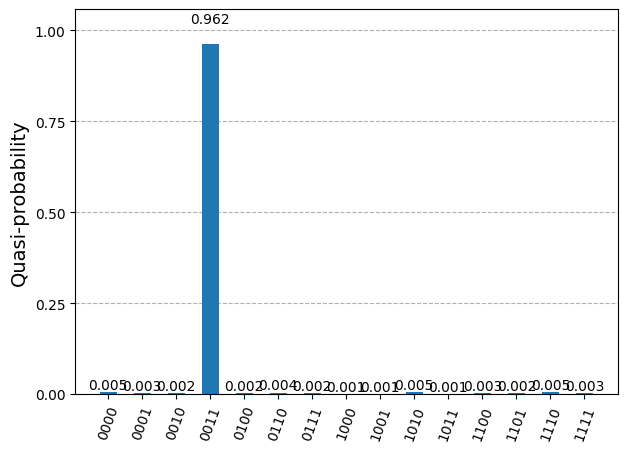

In [15]:
plot_distribution(dist)